In [11]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from collections import Counter
import tensorflow.keras as keras
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import keras_cv

from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import requests

import os
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow.keras as keras
from tensorflow.keras.layers import Dense, Input, Flatten, Conv2D, BatchNormalization, \
                                    Activation, Dropout, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard
from IPython.display import YouTubeVideo
from PIL import Image

C:\Users\Kasparas\anaconda3\envs\tf\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
C:\Users\Kasparas\anaconda3\envs\tf\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [12]:
data = np.load('flatland_train.npz')
X = data['X']
y = data['y']

y[y != 0] -= 2    # Correct labels so that triangle is mapped to class 1
X = X / 255.      # Scale down to range [0, 1]

In [13]:
X_turbo=np.concatenate((X,X,X,X,X,X))
y_turbo=np.concatenate((y,y,y,y,y,y))
X_turbo = np.expand_dims(X_turbo, axis=3)

In [14]:
datagen = ImageDataGenerator(
    rotation_range=50,
    width_shift_range=0.5,
    height_shift_range=0.5,
    zoom_range = [0.4, 1.6],
    shear_range = 11,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest')

In [15]:
datagen.fit(X_turbo)

In [16]:
initial_learning_rate = 4e-4
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=10000,
    decay_rate=0.98,
    staircase=True)

Model: "sequential_58"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_158 (Conv2D)         (None, 38, 38, 64)        10880     
                                                                 
 conv2d_159 (Conv2D)         (None, 36, 36, 64)        36928     
                                                                 
 max_pooling2d_114 (MaxPooli  (None, 18, 18, 64)       0         
 ng2D)                                                           
                                                                 
 conv2d_160 (Conv2D)         (None, 16, 16, 128)       73856     
                                                                 
 conv2d_161 (Conv2D)         (None, 14, 14, 128)       147584    
                                                                 
 max_pooling2d_115 (MaxPooli  (None, 7, 7, 128)        0         
 ng2D)                                               

938/938 [==============================] - 29s 31ms/step - loss: 0.3867 - accuracy: 0.8631
Epoch 143/150
938/938 [==============================] - 29s 31ms/step - loss: 0.3942 - accuracy: 0.8602
Epoch 144/150
938/938 [==============================] - 30s 32ms/step - loss: 0.3885 - accuracy: 0.8644
Epoch 145/150
938/938 [==============================] - 29s 31ms/step - loss: 0.3843 - accuracy: 0.8655
Epoch 146/150
938/938 [==============================] - 29s 31ms/step - loss: 0.3872 - accuracy: 0.8646
Epoch 147/150
938/938 [==============================] - 29s 31ms/step - loss: 0.3880 - accuracy: 0.8629
Epoch 148/150
938/938 [==============================] - 29s 31ms/step - loss: 0.3862 - accuracy: 0.8647
Epoch 149/150
938/938 [==============================] - 29s 31ms/step - loss: 0.3928 - accuracy: 0.8620
Epoch 150/150
938/938 [==============================] - 29s 31ms/step - loss: 0.3886 - accuracy: 0.8639


<AxesSubplot:>

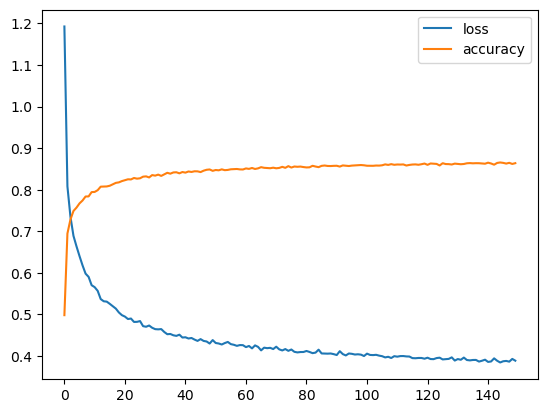

In [70]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(64, kernel_size=(13, 13), activation='relu', input_shape=[50, 50, 1]))

model.add(keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))

model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
          
model.add(keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))

model.add(keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))

model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())

model.add(keras.layers.Dense(10, activation="softmax"))
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Adam(learning_rate=lr_schedule),
              metrics=["accuracy"])
model.summary()

loss = model.fit(datagen.flow(X_turbo,y_turbo,batch_size=64), epochs=150)

pd.DataFrame(loss.history).plot()

In [71]:
model.save('Cannon_lite.h5')

Model: "sequential_59"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_162 (Conv2D)         (None, 38, 38, 128)       21760     
                                                                 
 conv2d_163 (Conv2D)         (None, 36, 36, 128)       147584    
                                                                 
 max_pooling2d_116 (MaxPooli  (None, 18, 18, 128)      0         
 ng2D)                                                           
                                                                 
 conv2d_164 (Conv2D)         (None, 16, 16, 128)       147584    
                                                                 
 conv2d_165 (Conv2D)         (None, 14, 14, 128)       147584    
                                                                 
 max_pooling2d_117 (MaxPooli  (None, 7, 7, 128)        0         
 ng2D)                                               

938/938 [==============================] - 46s 49ms/step - loss: 0.3828 - accuracy: 0.8654
Epoch 143/150
938/938 [==============================] - 46s 49ms/step - loss: 0.3793 - accuracy: 0.8685
Epoch 144/150
938/938 [==============================] - 46s 48ms/step - loss: 0.3866 - accuracy: 0.8646
Epoch 145/150
938/938 [==============================] - 45s 48ms/step - loss: 0.3828 - accuracy: 0.8658
Epoch 146/150
938/938 [==============================] - 47s 50ms/step - loss: 0.3812 - accuracy: 0.8668
Epoch 147/150
938/938 [==============================] - 45s 48ms/step - loss: 0.3766 - accuracy: 0.8676
Epoch 148/150
938/938 [==============================] - 45s 48ms/step - loss: 0.3849 - accuracy: 0.8652
Epoch 149/150
938/938 [==============================] - 45s 48ms/step - loss: 0.3806 - accuracy: 0.8675
Epoch 150/150
938/938 [==============================] - 45s 48ms/step - loss: 0.3820 - accuracy: 0.8666


<AxesSubplot:>

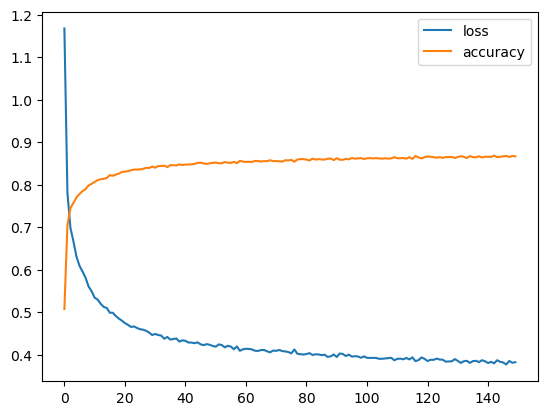

In [72]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(128, kernel_size=(13, 13), activation='relu', input_shape=[50, 50, 1]))

model.add(keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))

model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
          
model.add(keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))

model.add(keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))

model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())

model.add(keras.layers.Dense(10, activation="softmax"))
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Adam(learning_rate=lr_schedule),
              metrics=["accuracy"])
model.summary()

loss = model.fit(datagen.flow(X_turbo,y_turbo,batch_size=64), epochs=150)

pd.DataFrame(loss.history).plot()

In [73]:
model.save('Cannon.h5')

Model: "sequential_60"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_166 (Conv2D)         (None, 38, 38, 64)        10880     
                                                                 
 conv2d_167 (Conv2D)         (None, 36, 36, 64)        36928     
                                                                 
 max_pooling2d_118 (MaxPooli  (None, 18, 18, 64)       0         
 ng2D)                                                           
                                                                 
 conv2d_168 (Conv2D)         (None, 16, 16, 128)       73856     
                                                                 
 conv2d_169 (Conv2D)         (None, 14, 14, 128)       147584    
                                                                 
 max_pooling2d_119 (MaxPooli  (None, 7, 7, 128)        0         
 ng2D)                                               

469/469 [==============================] - 26s 56ms/step - loss: 0.3977 - accuracy: 0.8595
Epoch 143/150
469/469 [==============================] - 27s 57ms/step - loss: 0.3907 - accuracy: 0.8643
Epoch 144/150
469/469 [==============================] - 26s 56ms/step - loss: 0.3938 - accuracy: 0.8610
Epoch 145/150
469/469 [==============================] - 26s 56ms/step - loss: 0.3973 - accuracy: 0.8598
Epoch 146/150
469/469 [==============================] - 26s 56ms/step - loss: 0.3971 - accuracy: 0.8613
Epoch 147/150
469/469 [==============================] - 26s 56ms/step - loss: 0.3934 - accuracy: 0.8615
Epoch 148/150
469/469 [==============================] - 26s 56ms/step - loss: 0.3950 - accuracy: 0.8608
Epoch 149/150
469/469 [==============================] - 26s 56ms/step - loss: 0.3890 - accuracy: 0.8623
Epoch 150/150
469/469 [==============================] - 26s 56ms/step - loss: 0.3933 - accuracy: 0.8604


<AxesSubplot:>

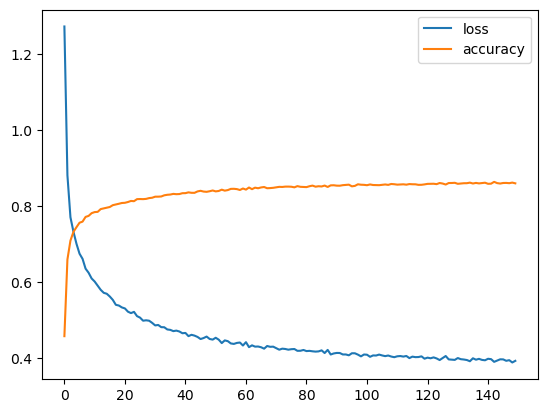

In [74]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(64, kernel_size=(13, 13), activation='relu', input_shape=[50, 50, 1]))

model.add(keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))

model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
          
model.add(keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))

model.add(keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))

model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())

model.add(keras.layers.Dense(10, activation="softmax"))
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Adam(learning_rate=lr_schedule),
              metrics=["accuracy"])
model.summary()

loss = model.fit(datagen.flow(X_turbo,y_turbo,batch_size=128), epochs=150)

pd.DataFrame(loss.history).plot()

In [75]:
model.save('Cannon_lite2.h5')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 38, 38, 128)       21760     
                                                                 
 conv2d_1 (Conv2D)           (None, 36, 36, 128)       147584    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 18, 18, 128)      0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 128)       147584    
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                    

469/469 [==============================] - 42s 89ms/step - loss: 0.3488 - accuracy: 0.8790
Epoch 143/150
469/469 [==============================] - 42s 89ms/step - loss: 0.3446 - accuracy: 0.8843
Epoch 144/150
469/469 [==============================] - 42s 89ms/step - loss: 0.3443 - accuracy: 0.8835
Epoch 145/150
469/469 [==============================] - 42s 89ms/step - loss: 0.3464 - accuracy: 0.8807
Epoch 146/150
469/469 [==============================] - 42s 89ms/step - loss: 0.3439 - accuracy: 0.8821
Epoch 147/150
469/469 [==============================] - 42s 89ms/step - loss: 0.3423 - accuracy: 0.8839
Epoch 148/150
469/469 [==============================] - 42s 89ms/step - loss: 0.3434 - accuracy: 0.8833
Epoch 149/150
469/469 [==============================] - 42s 89ms/step - loss: 0.3449 - accuracy: 0.8819
Epoch 150/150
469/469 [==============================] - 42s 89ms/step - loss: 0.3427 - accuracy: 0.8841


<AxesSubplot:>

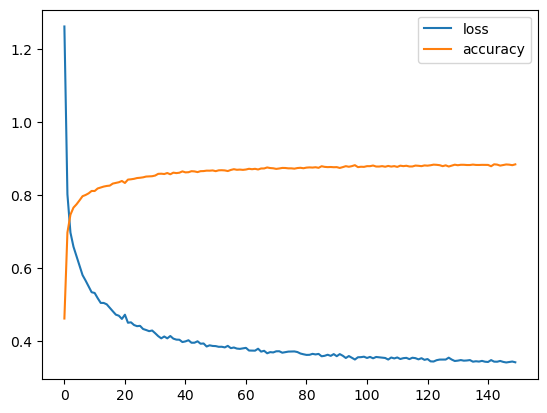

In [7]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(128, kernel_size=(13, 13), activation='relu', input_shape=[50, 50, 1]))

model.add(keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))

model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
          
model.add(keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))

model.add(keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))

model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())

model.add(keras.layers.Dense(10, activation="softmax"))
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Adam(learning_rate=lr_schedule),
              metrics=["accuracy"])
model.summary()

loss = model.fit(datagen.flow(X_turbo,y_turbo,batch_size=128), epochs=150)

pd.DataFrame(loss.history).plot()

In [8]:
model.save('Cannon2.h5')

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 38, 38, 64)        10880     
                                                                 
 conv2d_5 (Conv2D)           (None, 36, 36, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 128)       147584    
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                  

938/938 [==============================] - 29s 31ms/step - loss: 0.3566 - accuracy: 0.8782
Epoch 143/150
938/938 [==============================] - 29s 31ms/step - loss: 0.3594 - accuracy: 0.8762
Epoch 144/150
938/938 [==============================] - 29s 31ms/step - loss: 0.3540 - accuracy: 0.8800
Epoch 145/150
938/938 [==============================] - 29s 31ms/step - loss: 0.3585 - accuracy: 0.8776
Epoch 146/150
938/938 [==============================] - 29s 31ms/step - loss: 0.3539 - accuracy: 0.8777
Epoch 147/150
938/938 [==============================] - 29s 31ms/step - loss: 0.3566 - accuracy: 0.8790
Epoch 148/150
938/938 [==============================] - 29s 31ms/step - loss: 0.3566 - accuracy: 0.8770
Epoch 149/150
938/938 [==============================] - 29s 31ms/step - loss: 0.3591 - accuracy: 0.8775
Epoch 150/150
938/938 [==============================] - 29s 31ms/step - loss: 0.3585 - accuracy: 0.8780


<AxesSubplot:>

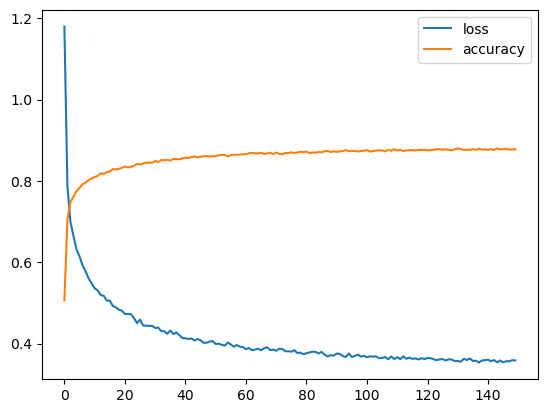

In [9]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(64, kernel_size=(13, 13), activation='relu', input_shape=[50, 50, 1]))

model.add(keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))

model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
          
model.add(keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))

model.add(keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))

model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())

model.add(keras.layers.Dense(10, activation="softmax"))
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Adam(learning_rate=3e-4),
              metrics=["accuracy"])
model.summary()

loss = model.fit(datagen.flow(X_turbo,y_turbo,batch_size=64), epochs=150)

pd.DataFrame(loss.history).plot()

In [10]:
model.save('Cannon_lite3.h5')

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 38, 38, 128)       21760     
                                                                 
 conv2d_9 (Conv2D)           (None, 36, 36, 128)       147584    
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 18, 18, 128)      0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 16, 16, 128)       147584    
                                                                 
 conv2d_11 (Conv2D)          (None, 14, 14, 128)       147584    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                  

469/469 [==============================] - 42s 89ms/step - loss: 0.3476 - accuracy: 0.8818
Epoch 143/150
469/469 [==============================] - 42s 89ms/step - loss: 0.3432 - accuracy: 0.8830
Epoch 144/150
469/469 [==============================] - 42s 89ms/step - loss: 0.3478 - accuracy: 0.8827
Epoch 145/150
469/469 [==============================] - 42s 89ms/step - loss: 0.3518 - accuracy: 0.8810
Epoch 146/150
469/469 [==============================] - 42s 89ms/step - loss: 0.3507 - accuracy: 0.8813
Epoch 147/150
469/469 [==============================] - 42s 89ms/step - loss: 0.3517 - accuracy: 0.8790
Epoch 148/150
469/469 [==============================] - 42s 89ms/step - loss: 0.3429 - accuracy: 0.8846
Epoch 149/150
469/469 [==============================] - 42s 89ms/step - loss: 0.3521 - accuracy: 0.8809
Epoch 150/150
469/469 [==============================] - 42s 89ms/step - loss: 0.3456 - accuracy: 0.8842


<AxesSubplot:>

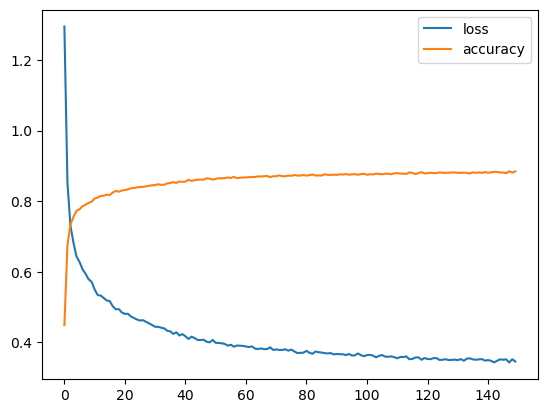

In [11]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(128, kernel_size=(13, 13), activation='relu', input_shape=[50, 50, 1]))

model.add(keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))

model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
          
model.add(keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))

model.add(keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))

model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())

model.add(keras.layers.Dense(10, activation="softmax"))
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Adam(learning_rate=3e-4),
              metrics=["accuracy"])
model.summary()

loss = model.fit(datagen.flow(X_turbo,y_turbo,batch_size=128), epochs=150)

pd.DataFrame(loss.history).plot()

In [12]:
model.save('Cannon3.h5')

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 38, 38, 64)        10880     
                                                                 
 conv2d_13 (Conv2D)          (None, 36, 36, 64)        36928     
                                                                 
 batch_normalization (BatchN  (None, 36, 36, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 18, 18, 64)       0         
 2D)                                                             
                                                                 
 batch_normalization_1 (Batc  (None, 18, 18, 64)       256       
 hNormalization)                                                 
                                                      

469/469 [==============================] - 29s 62ms/step - loss: 0.3608 - accuracy: 0.8764
Epoch 137/150
469/469 [==============================] - 29s 62ms/step - loss: 0.3584 - accuracy: 0.8788
Epoch 138/150
469/469 [==============================] - 29s 63ms/step - loss: 0.3628 - accuracy: 0.8766
Epoch 139/150
469/469 [==============================] - 29s 63ms/step - loss: 0.3598 - accuracy: 0.8763
Epoch 140/150
469/469 [==============================] - 30s 65ms/step - loss: 0.3669 - accuracy: 0.8754
Epoch 141/150
469/469 [==============================] - 29s 62ms/step - loss: 0.3626 - accuracy: 0.8762
Epoch 142/150
469/469 [==============================] - 29s 62ms/step - loss: 0.3538 - accuracy: 0.8793
Epoch 143/150
469/469 [==============================] - 30s 63ms/step - loss: 0.3607 - accuracy: 0.8769
Epoch 144/150
469/469 [==============================] - 30s 63ms/step - loss: 0.3639 - accuracy: 0.8749
Epoch 145/150
469/469 [==============================] - 30s 63ms/ste

<AxesSubplot:>

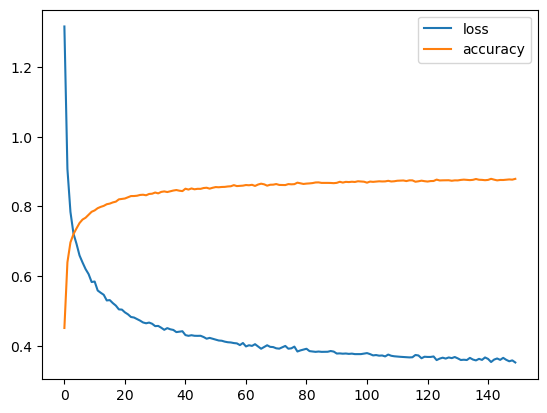

In [13]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(64, kernel_size=(13, 13), activation='relu', input_shape=[50, 50, 1]))

model.add(keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))

model.add(tf.keras.layers.BatchNormalization())

model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.BatchNormalization())
          
model.add(keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))

model.add(keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))

model.add(tf.keras.layers.BatchNormalization())

model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())

model.add(keras.layers.Dense(10, activation="softmax"))
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Adam(learning_rate=lr_schedule),
              metrics=["accuracy"])
model.summary()

loss = model.fit(datagen.flow(X_turbo,y_turbo,batch_size=128), epochs=150)

pd.DataFrame(loss.history).plot()

In [14]:
model.save('Cannon_lite4.h5')

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 38, 38, 128)       21760     
                                                                 
 conv2d_17 (Conv2D)          (None, 36, 36, 128)       147584    
                                                                 
 batch_normalization_3 (Batc  (None, 36, 36, 128)      512       
 hNormalization)                                                 
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 18, 18, 128)      0         
 2D)                                                             
                                                                 
 batch_normalization_4 (Batc  (None, 18, 18, 128)      512       
 hNormalization)                                                 
                                                      

469/469 [==============================] - 48s 103ms/step - loss: 0.4008 - accuracy: 0.8632
Epoch 59/150
469/469 [==============================] - 48s 103ms/step - loss: 0.3912 - accuracy: 0.8653
Epoch 60/150
469/469 [==============================] - 48s 103ms/step - loss: 0.3939 - accuracy: 0.8655
Epoch 61/150
469/469 [==============================] - 48s 103ms/step - loss: 0.3862 - accuracy: 0.8683
Epoch 62/150
469/469 [==============================] - 48s 103ms/step - loss: 0.3901 - accuracy: 0.8645
Epoch 63/150
469/469 [==============================] - 48s 101ms/step - loss: 0.3919 - accuracy: 0.8647
Epoch 64/150
469/469 [==============================] - 48s 101ms/step - loss: 0.3884 - accuracy: 0.8670
Epoch 65/150
469/469 [==============================] - 47s 101ms/step - loss: 0.3860 - accuracy: 0.8658
Epoch 66/150
469/469 [==============================] - 48s 103ms/step - loss: 0.3882 - accuracy: 0.8681
Epoch 67/150
469/469 [==============================] - 48s 102ms/st

<AxesSubplot:>

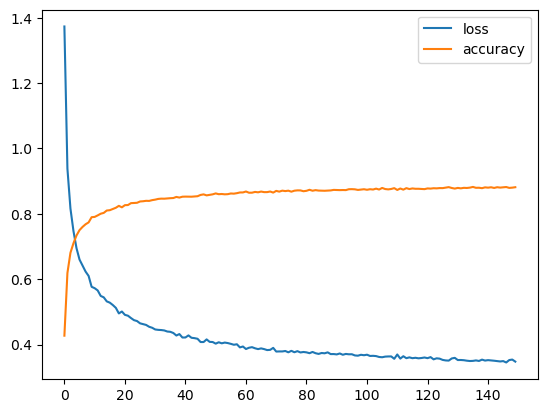

In [15]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(128, kernel_size=(13, 13), activation='relu', input_shape=[50, 50, 1]))

model.add(keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))

model.add(tf.keras.layers.BatchNormalization())

model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.BatchNormalization())
          
model.add(keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))

model.add(keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))

model.add(tf.keras.layers.BatchNormalization())

model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())

model.add(keras.layers.Dense(10, activation="softmax"))
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Adam(learning_rate=lr_schedule),
              metrics=["accuracy"])
model.summary()

loss = model.fit(datagen.flow(X_turbo,y_turbo,batch_size=128), epochs=150)

pd.DataFrame(loss.history).plot()

In [16]:
model.save('Cannon4.h5')

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 38, 38, 64)        10880     
                                                                 
 conv2d_21 (Conv2D)          (None, 36, 36, 64)        36928     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 18, 18, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 16, 16, 128)       73856     
                                                                 
 conv2d_23 (Conv2D)          (None, 14, 14, 128)       147584    
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 7, 7, 128)        0         
 g2D)                                                 

469/469 [==============================] - 27s 58ms/step - loss: 0.4031 - accuracy: 0.8538
Epoch 138/150
469/469 [==============================] - 27s 58ms/step - loss: 0.4057 - accuracy: 0.8520
Epoch 139/150
469/469 [==============================] - 27s 58ms/step - loss: 0.4041 - accuracy: 0.8522
Epoch 140/150
469/469 [==============================] - 27s 57ms/step - loss: 0.3997 - accuracy: 0.8567
Epoch 141/150
469/469 [==============================] - 27s 57ms/step - loss: 0.4060 - accuracy: 0.8529
Epoch 142/150
469/469 [==============================] - 27s 57ms/step - loss: 0.4034 - accuracy: 0.8551
Epoch 143/150
469/469 [==============================] - 27s 57ms/step - loss: 0.4002 - accuracy: 0.8567
Epoch 144/150
469/469 [==============================] - 27s 57ms/step - loss: 0.4032 - accuracy: 0.8527
Epoch 145/150
469/469 [==============================] - 27s 58ms/step - loss: 0.4000 - accuracy: 0.8551
Epoch 146/150
469/469 [==============================] - 27s 58ms/ste

<AxesSubplot:>

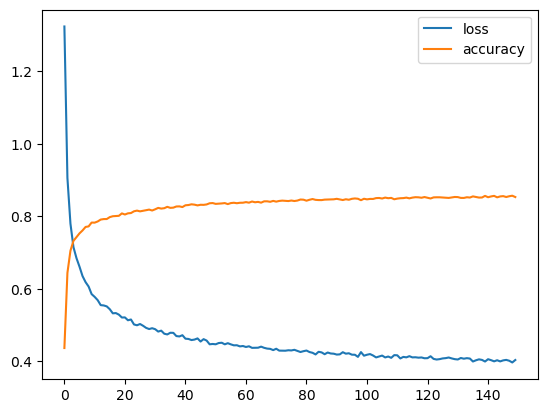

In [17]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(64, kernel_size=(13, 13), activation='relu', input_shape=[50, 50, 1]))

model.add(keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))

model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
          
model.add(keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))

model.add(keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))

model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(keras.layers.Dense(256, activation="relu"))
model.add(Dropout(0.4))

model.add(keras.layers.Dense(10, activation="softmax"))
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Adam(learning_rate=lr_schedule),
              metrics=["accuracy"])
model.summary()

loss = model.fit(datagen.flow(X_turbo,y_turbo,batch_size=128), epochs=150)

pd.DataFrame(loss.history).plot()

In [18]:
model.save('Cannon_lite5.h5')

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 38, 38, 64)        10880     
                                                                 
 conv2d_25 (Conv2D)          (None, 36, 36, 64)        36928     
                                                                 
 conv2d_26 (Conv2D)          (None, 34, 34, 64)        36928     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 17, 17, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_27 (Conv2D)          (None, 15, 15, 128)       73856     
                                                                 
 conv2d_28 (Conv2D)          (None, 13, 13, 128)       147584    
                                                      

469/469 [==============================] - 37s 79ms/step - loss: 0.3711 - accuracy: 0.8678
Epoch 134/150
469/469 [==============================] - 37s 79ms/step - loss: 0.3710 - accuracy: 0.8666
Epoch 135/150
469/469 [==============================] - 37s 79ms/step - loss: 0.3684 - accuracy: 0.8688
Epoch 136/150
469/469 [==============================] - 37s 79ms/step - loss: 0.3658 - accuracy: 0.8684
Epoch 137/150
469/469 [==============================] - 37s 79ms/step - loss: 0.3688 - accuracy: 0.8683
Epoch 138/150
469/469 [==============================] - 37s 79ms/step - loss: 0.3740 - accuracy: 0.8647
Epoch 139/150
469/469 [==============================] - 37s 79ms/step - loss: 0.3732 - accuracy: 0.8658
Epoch 140/150
469/469 [==============================] - 37s 79ms/step - loss: 0.3741 - accuracy: 0.8648
Epoch 141/150
469/469 [==============================] - 37s 79ms/step - loss: 0.3712 - accuracy: 0.8655
Epoch 142/150
469/469 [==============================] - 37s 79ms/ste

<AxesSubplot:>

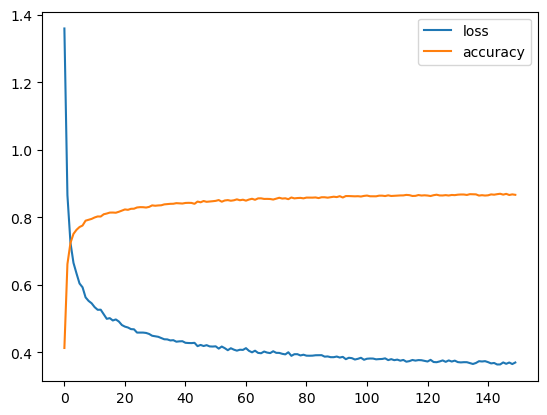

In [19]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(64, kernel_size=(13, 13), activation='relu', input_shape=[50, 50, 1]))

model.add(keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))

model.add(keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))

model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
          
model.add(keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))

model.add(keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))

model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(keras.layers.Conv2D(256, kernel_size=(3, 3), activation='relu'))

model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(keras.layers.Dense(256, activation="relu"))
model.add(Dropout(0.4))

model.add(keras.layers.Dense(10, activation="softmax"))
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Adam(learning_rate=lr_schedule),
              metrics=["accuracy"])
model.summary()

loss = model.fit(datagen.flow(X_turbo,y_turbo,batch_size=128), epochs=150)

pd.DataFrame(loss.history).plot()

In [20]:
model.save('Cannon5.h5')

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 38, 38, 64)        10880     
                                                                 
 conv2d_31 (Conv2D)          (None, 36, 36, 64)        36928     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 18, 18, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 16, 16, 128)       73856     
                                                                 
 conv2d_33 (Conv2D)          (None, 14, 14, 128)       147584    
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 7, 7, 128)        0         
 g2D)                                                 

235/235 [==============================] - 25s 108ms/step - loss: 0.3666 - accuracy: 0.8745
Epoch 141/150
235/235 [==============================] - 25s 107ms/step - loss: 0.3693 - accuracy: 0.8741
Epoch 142/150
235/235 [==============================] - 26s 108ms/step - loss: 0.3630 - accuracy: 0.8771
Epoch 143/150
235/235 [==============================] - 25s 107ms/step - loss: 0.3655 - accuracy: 0.8748
Epoch 144/150
235/235 [==============================] - 25s 107ms/step - loss: 0.3708 - accuracy: 0.8733
Epoch 145/150
235/235 [==============================] - 26s 111ms/step - loss: 0.3650 - accuracy: 0.8765
Epoch 146/150
235/235 [==============================] - 26s 110ms/step - loss: 0.3672 - accuracy: 0.8750
Epoch 147/150
235/235 [==============================] - 28s 118ms/step - loss: 0.3655 - accuracy: 0.8757
Epoch 148/150
235/235 [==============================] - 27s 114ms/step - loss: 0.3670 - accuracy: 0.8738
Epoch 149/150
235/235 [==============================] - 26s

<AxesSubplot:>

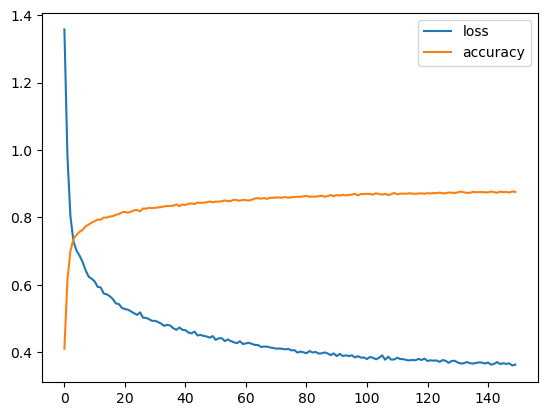

In [21]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(64, kernel_size=(13, 13), activation='relu', input_shape=[50, 50, 1]))

model.add(keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))

model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
          
model.add(keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))

model.add(keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))

model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())

model.add(keras.layers.Dense(10, activation="softmax"))
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Adam(learning_rate=lr_schedule),
              metrics=["accuracy"])
model.summary()

loss = model.fit(datagen.flow(X_turbo,y_turbo,batch_size=256), epochs=150)

pd.DataFrame(loss.history).plot()

In [22]:
model.save('Cannon_lite6.h5')

In [23]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(128, kernel_size=(13, 13), activation='relu', input_shape=[50, 50, 1]))

model.add(keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))

model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
          
model.add(keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))

model.add(keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))

model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())

model.add(keras.layers.Dense(10, activation="softmax"))
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Adam(learning_rate=3e-4),
              metrics=["accuracy"])
model.summary()

loss = model.fit(datagen.flow(X_turbo,y_turbo,batch_size=128), epochs=150)


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_34 (Conv2D)          (None, 38, 38, 128)       21760     
                                                                 
 conv2d_35 (Conv2D)          (None, 36, 36, 128)       147584    
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 18, 18, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_36 (Conv2D)          (None, 16, 16, 128)       147584    
                                                                 
 conv2d_37 (Conv2D)          (None, 14, 14, 128)       147584    
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 7, 7, 128)        0         
 g2D)                                                 

469/469 [==============================] - 42s 89ms/step - loss: 0.3513 - accuracy: 0.8820
Epoch 143/150
469/469 [==============================] - 42s 89ms/step - loss: 0.3480 - accuracy: 0.8816
Epoch 144/150
469/469 [==============================] - 42s 89ms/step - loss: 0.3479 - accuracy: 0.8827
Epoch 145/150
469/469 [==============================] - 42s 89ms/step - loss: 0.3489 - accuracy: 0.8803
Epoch 146/150
469/469 [==============================] - 42s 89ms/step - loss: 0.3451 - accuracy: 0.8818
Epoch 147/150
469/469 [==============================] - 42s 89ms/step - loss: 0.3443 - accuracy: 0.8825
Epoch 148/150
469/469 [==============================] - 42s 89ms/step - loss: 0.3464 - accuracy: 0.8820
Epoch 149/150
469/469 [==============================] - 42s 89ms/step - loss: 0.3497 - accuracy: 0.8810
Epoch 150/150
469/469 [==============================] - 42s 89ms/step - loss: 0.3428 - accuracy: 0.8846


In [24]:
model.save('Cannon6.h5')

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_38 (Conv2D)          (None, 38, 38, 64)        10880     
                                                                 
 conv2d_39 (Conv2D)          (None, 36, 36, 64)        36928     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 18, 18, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_40 (Conv2D)          (None, 16, 16, 128)       73856     
                                                                 
 conv2d_41 (Conv2D)          (None, 14, 14, 128)       147584    
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 7, 7, 128)        0         
 g2D)                                                 

118/118 [==============================] - 25s 209ms/step - loss: 0.3994 - accuracy: 0.8629
Epoch 141/200
118/118 [==============================] - 25s 208ms/step - loss: 0.3931 - accuracy: 0.8663
Epoch 142/200
118/118 [==============================] - 25s 210ms/step - loss: 0.3963 - accuracy: 0.8648
Epoch 143/200
118/118 [==============================] - 25s 208ms/step - loss: 0.3943 - accuracy: 0.8661
Epoch 144/200
118/118 [==============================] - 25s 211ms/step - loss: 0.3964 - accuracy: 0.8653
Epoch 145/200
118/118 [==============================] - 25s 208ms/step - loss: 0.3988 - accuracy: 0.8648
Epoch 146/200
118/118 [==============================] - 25s 209ms/step - loss: 0.4016 - accuracy: 0.8631
Epoch 147/200
118/118 [==============================] - 25s 208ms/step - loss: 0.3925 - accuracy: 0.8653
Epoch 148/200
118/118 [==============================] - 25s 209ms/step - loss: 0.3893 - accuracy: 0.8676
Epoch 149/200
118/118 [==============================] - 25s

<AxesSubplot:>

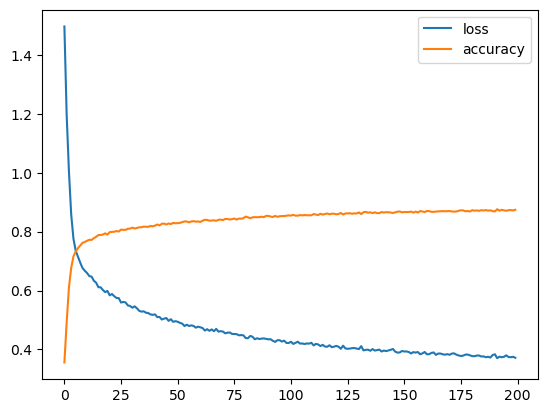

In [25]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(64, kernel_size=(13, 13), activation='relu', input_shape=[50, 50, 1]))

model.add(keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))

model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
          
model.add(keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))

model.add(keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))

model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())

model.add(keras.layers.Dense(10, activation="softmax"))
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Adam(learning_rate=lr_schedule),
              metrics=["accuracy"])
model.summary()

loss = model.fit(datagen.flow(X_turbo,y_turbo,batch_size=512), epochs=200)

pd.DataFrame(loss.history).plot()

In [26]:
model.save('Cannon_lite007.h5')

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_42 (Conv2D)          (None, 38, 38, 64)        10880     
                                                                 
 conv2d_43 (Conv2D)          (None, 36, 36, 64)        36928     
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 18, 18, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_44 (Conv2D)          (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 8, 8, 128)        0         
 g2D)                                                            
                                                                 
 flatten_10 (Flatten)        (None, 8192)            

235/235 [==============================] - 23s 96ms/step - loss: 0.4136 - accuracy: 0.8620
Epoch 144/150
235/235 [==============================] - 23s 98ms/step - loss: 0.4107 - accuracy: 0.8629
Epoch 145/150
235/235 [==============================] - 23s 96ms/step - loss: 0.4090 - accuracy: 0.8651
Epoch 146/150
235/235 [==============================] - 22s 94ms/step - loss: 0.4161 - accuracy: 0.8608
Epoch 147/150
235/235 [==============================] - 23s 98ms/step - loss: 0.4128 - accuracy: 0.8626
Epoch 148/150
235/235 [==============================] - 23s 95ms/step - loss: 0.4140 - accuracy: 0.8637
Epoch 149/150
235/235 [==============================] - 23s 95ms/step - loss: 0.4091 - accuracy: 0.8634
Epoch 150/150
235/235 [==============================] - 24s 100ms/step - loss: 0.4118 - accuracy: 0.8636


<AxesSubplot:>

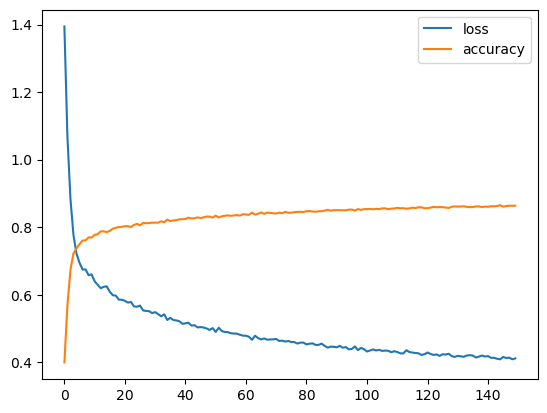

In [27]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(64, kernel_size=(13, 13), activation='relu', input_shape=[50, 50, 1]))

model.add(keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))

model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
          
model.add(keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))

model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())

model.add(keras.layers.Dense(10, activation="softmax"))
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Adam(learning_rate=lr_schedule),
              metrics=["accuracy"])
model.summary()

loss = model.fit(datagen.flow(X_turbo,y_turbo,batch_size=256), epochs=150)

pd.DataFrame(loss.history).plot()

In [28]:
model.save('Cannon_lite8.h5')

In [31]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(128, kernel_size=(13, 13), activation='relu', input_shape=[50, 50, 1]))

model.add(keras.layers.Conv2D(128, kernel_size=(9, 9), activation='relu'))

model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())

model.add(keras.layers.Dense(10, activation="softmax"))
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Adam(learning_rate=lr_schedule),
              metrics=["accuracy"])
model.summary()

loss = model.fit(datagen.flow(X_turbo,y_turbo,batch_size=256), epochs=150)

pd.DataFrame(loss.history).plot()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_47 (Conv2D)          (None, 38, 38, 128)       21760     
                                                                 
 conv2d_48 (Conv2D)          (None, 30, 30, 128)       1327232   
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 15, 15, 128)      0         
 g2D)                                                            
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 7, 7, 128)        0         
 g2D)                                                            
                                                                 
 flatten_12 (Flatten)        (None, 6272)              0         
                                                                 
 dense_14 (Dense)            (None, 10)              

KeyboardInterrupt: 

In [ ]:
model.save('Cannon_lite9.h5')

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(64, kernel_size=(13, 13), activation='relu', input_shape=[50, 50, 1]))

model.add(keras.layers.Conv2D(64, kernel_size=(9, 9), activation='relu'))

model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())

model.add(keras.layers.Dense(10, activation="softmax"))
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Adam(learning_rate=lr_schedule),
              metrics=["accuracy"])
model.summary()

loss = model.fit(datagen.flow(X_turbo,y_turbo,batch_size=256), epochs=150)

pd.DataFrame(loss.history).plot()

In [ ]:
model.save('Cannon_lite10.h5')

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(64, kernel_size=(13, 13), activation='relu', input_shape=[50, 50, 1]))

model.add(keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))

model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
          
model.add(keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))

model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())

model.add(keras.layers.Dense(10, activation="softmax"))
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Adam(learning_rate=lr_schedule),
              metrics=["accuracy"])
model.summary()

loss = model.fit(datagen.flow(X_turbo,y_turbo,batch_size=512), epochs=150)

pd.DataFrame(loss.history).plot()

In [ ]:
model.save('Cannon_lite11.h5')

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(64, kernel_size=(13, 13), activation='relu', input_shape=[50, 50, 1]))

model.add(keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))

model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
          
model.add(keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))

model.add(keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))

model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())

model.add(keras.layers.Dense(10, activation="softmax"))
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Adam(learning_rate=lr_schedule),
              metrics=["accuracy"])
model.summary()

loss = model.fit(datagen.flow(X_turbo,y_turbo,batch_size=512), epochs=150)

pd.DataFrame(loss.history).plot()

In [ ]:
model.save('Cannon_lite12.h5')

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_56 (Conv2D)          (None, 38, 38, 64)        10880     
                                                                 
 conv2d_57 (Conv2D)          (None, 36, 36, 64)        36928     
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 18, 18, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_58 (Conv2D)          (None, 16, 16, 128)       73856     
                                                                 
 conv2d_59 (Conv2D)          (None, 14, 14, 128)       147584    
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 7, 7, 128)        0         
 g2D)                                                

938/938 [==============================] - 31s 32ms/step - loss: 0.3574 - accuracy: 0.8772
Epoch 143/150
938/938 [==============================] - 31s 33ms/step - loss: 0.3580 - accuracy: 0.8769
Epoch 144/150
938/938 [==============================] - 31s 33ms/step - loss: 0.3582 - accuracy: 0.8779
Epoch 145/150
938/938 [==============================] - 32s 34ms/step - loss: 0.3543 - accuracy: 0.8794
Epoch 146/150
938/938 [==============================] - 31s 33ms/step - loss: 0.3563 - accuracy: 0.8786
Epoch 147/150
938/938 [==============================] - 31s 33ms/step - loss: 0.3540 - accuracy: 0.8801
Epoch 148/150
938/938 [==============================] - 31s 33ms/step - loss: 0.3560 - accuracy: 0.8778
Epoch 149/150
938/938 [==============================] - 31s 33ms/step - loss: 0.3584 - accuracy: 0.8766
Epoch 150/150
938/938 [==============================] - 31s 33ms/step - loss: 0.3540 - accuracy: 0.8805


<AxesSubplot:>

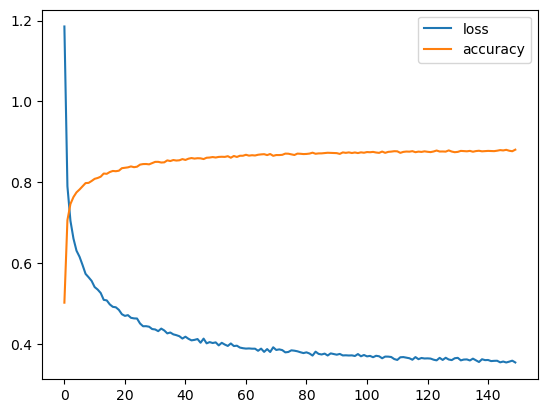

In [50]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(64, kernel_size=(13, 13), activation='relu', input_shape=[50, 50, 1]))

model.add(keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))

model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
          
model.add(keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))

model.add(keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))

model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())

model.add(keras.layers.Dense(10, activation="softmax"))
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Adam(learning_rate=3e-4),
              metrics=["accuracy"])
model.summary()

loss = model.fit(datagen.flow(X_turbo,y_turbo,batch_size=64), epochs=150)

pd.DataFrame(loss.history).plot()

In [51]:
model.save('Cannon_lite1.h5')

In [52]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(64, kernel_size=(13, 13), activation='relu', input_shape=[50, 50, 1]))

model.add(keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))

model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
          
model.add(keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))

model.add(keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))

model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())

model.add(keras.layers.Dense(10, activation="softmax"))
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Adam(learning_rate=3e-4),
              metrics=["accuracy"])
model.summary()

loss = model.fit(datagen.flow(X_turbo,y_turbo,batch_size=128), epochs=150)

pd.DataFrame(loss.history).plot()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_60 (Conv2D)          (None, 38, 38, 64)        10880     
                                                                 
 conv2d_61 (Conv2D)          (None, 36, 36, 64)        36928     
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 18, 18, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_62 (Conv2D)          (None, 16, 16, 128)       73856     
                                                                 
 conv2d_63 (Conv2D)          (None, 14, 14, 128)       147584    
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 7, 7, 128)        0         
 g2D)                                                

ResourceExhaustedError: Graph execution error:

2 root error(s) found.
  (0) RESOURCE_EXHAUSTED:  MemoryError: Unable to allocate 1.22 MiB for an array with shape (128, 50, 50, 1) and data type float32
Traceback (most recent call last):

  File "C:\Users\Kasparas\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\ops\script_ops.py", line 271, in __call__
    ret = func(*args)

  File "C:\Users\Kasparas\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\autograph\impl\api.py", line 642, in wrapper
    return func(*args, **kwargs)

  File "C:\Users\Kasparas\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\data\ops\dataset_ops.py", line 1035, in generator_py_func
    values = next(generator_state.get_iterator(iterator_id))

  File "C:\Users\Kasparas\anaconda3\envs\tf\lib\site-packages\keras\engine\data_adapter.py", line 904, in wrapped_generator
    yield self._standardize_batch(data)

  File "C:\Users\Kasparas\anaconda3\envs\tf\lib\site-packages\keras\engine\data_adapter.py", line 930, in _standardize_batch
    data = tf.nest.map_structure(_convert_dtype, data)

  File "C:\Users\Kasparas\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\util\nest.py", line 917, in map_structure
    structure[0], [func(*x) for x in entries],

  File "C:\Users\Kasparas\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\util\nest.py", line 917, in <listcomp>
    structure[0], [func(*x) for x in entries],

  File "C:\Users\Kasparas\anaconda3\envs\tf\lib\site-packages\keras\engine\data_adapter.py", line 927, in _convert_dtype
    return np.array(t, dtype=backend.floatx())

numpy.core._exceptions._ArrayMemoryError: Unable to allocate 1.22 MiB for an array with shape (128, 50, 50, 1) and data type float32


	 [[{{node PyFunc}}]]
	 [[IteratorGetNext]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.

	 [[IteratorGetNext/_7]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.

  (1) RESOURCE_EXHAUSTED:  MemoryError: Unable to allocate 1.22 MiB for an array with shape (128, 50, 50, 1) and data type float32
Traceback (most recent call last):

  File "C:\Users\Kasparas\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\ops\script_ops.py", line 271, in __call__
    ret = func(*args)

  File "C:\Users\Kasparas\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\autograph\impl\api.py", line 642, in wrapper
    return func(*args, **kwargs)

  File "C:\Users\Kasparas\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\data\ops\dataset_ops.py", line 1035, in generator_py_func
    values = next(generator_state.get_iterator(iterator_id))

  File "C:\Users\Kasparas\anaconda3\envs\tf\lib\site-packages\keras\engine\data_adapter.py", line 904, in wrapped_generator
    yield self._standardize_batch(data)

  File "C:\Users\Kasparas\anaconda3\envs\tf\lib\site-packages\keras\engine\data_adapter.py", line 930, in _standardize_batch
    data = tf.nest.map_structure(_convert_dtype, data)

  File "C:\Users\Kasparas\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\util\nest.py", line 917, in map_structure
    structure[0], [func(*x) for x in entries],

  File "C:\Users\Kasparas\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\util\nest.py", line 917, in <listcomp>
    structure[0], [func(*x) for x in entries],

  File "C:\Users\Kasparas\anaconda3\envs\tf\lib\site-packages\keras\engine\data_adapter.py", line 927, in _convert_dtype
    return np.array(t, dtype=backend.floatx())

numpy.core._exceptions._ArrayMemoryError: Unable to allocate 1.22 MiB for an array with shape (128, 50, 50, 1) and data type float32


	 [[{{node PyFunc}}]]
	 [[IteratorGetNext]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.

0 successful operations.
0 derived errors ignored. [Op:__inference_train_function_1463230]

In [ ]:
model.save('Cannon_lite2.h5')

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(64, kernel_size=(13, 13), activation='relu', input_shape=[50, 50, 1]))

model.add(keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))

model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
          
model.add(keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))

model.add(keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))

model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())

model.add(keras.layers.Dense(10, activation="softmax"))
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Adam(learning_rate=3e-4),
              metrics=["accuracy"])
model.summary()

loss = model.fit(datagen.flow(X_turbo,y_turbo,batch_size=128), epochs=150)

pd.DataFrame(loss.history).plot()

In [ ]:
model.save('Cannon_lite3.h5')

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(64, kernel_size=(13, 13), activation='relu', input_shape=[50, 50, 1]))

model.add(keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))

model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
          
model.add(keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))

model.add(keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))

model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())

model.add(keras.layers.Dense(10, activation="softmax"))
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Adam(learning_rate=3e-4),
              metrics=["accuracy"])
model.summary()

loss = model.fit(datagen.flow(X_turbo,y_turbo,batch_size=256), epochs=150)

pd.DataFrame(loss.history).plot()

In [ ]:
model.save('Cannon_lite4.h5')

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(64, kernel_size=(13, 13), activation='relu', input_shape=[50, 50, 1]))

model.add(keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))

model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
          
model.add(keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))

model.add(keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))

model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())

model.add(keras.layers.Dense(10, activation="softmax"))
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Adam(learning_rate=3e-4),
              metrics=["accuracy"])
model.summary()

loss = model.fit(datagen.flow(X_turbo,y_turbo,batch_size=128), epochs=150)

pd.DataFrame(loss.history).plot()

In [ ]:
model.save('Cannon_lite5.h5')

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(64, kernel_size=(13, 13), activation='relu', input_shape=[50, 50, 1]))

model.add(keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))

model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
          
model.add(keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))

model.add(keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))

model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())

model.add(keras.layers.Dense(10, activation="softmax"))
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Adam(learning_rate=3e-4),
              metrics=["accuracy"])
model.summary()

loss = model.fit(datagen.flow(X_turbo,y_turbo,batch_size=64), epochs=150)

pd.DataFrame(loss.history).plot()

In [ ]:
model.save('Cannon_lite6.h5')

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(13, 13), activation='relu', input_shape=[50, 50, 1]))

model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))

model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
          
model.add(keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))

model.add(keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))

model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())

model.add(keras.layers.Dense(10, activation="softmax"))
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Adam(learning_rate=3e-4),
              metrics=["accuracy"])
model.summary()

loss = model.fit(datagen.flow(X_turbo,y_turbo,batch_size=64), epochs=200)

pd.DataFrame(loss.history).plot()

In [ ]:
model.save('Cannon_lite7.h5')

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(16, kernel_size=(13, 13), activation='relu', input_shape=[50, 50, 1]))

model.add(keras.layers.Conv2D(16, kernel_size=(3, 3), activation='relu'))

model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
          
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))

model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))

model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())

model.add(keras.layers.Dense(10, activation="softmax"))
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Adam(learning_rate=3e-4),
              metrics=["accuracy"])
model.summary()

loss = model.fit(datagen.flow(X_turbo,y_turbo,batch_size=64), epochs=250)

pd.DataFrame(loss.history).plot()

In [ ]:
model.save('Cannon_lite8.h5')

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(16, kernel_size=(13, 13), activation='relu', input_shape=[50, 50, 1]))

model.add(keras.layers.Conv2D(16, kernel_size=(3, 3), activation='relu'))

model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
          
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))

model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))

model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))

model.add(keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))

model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(keras.layers.Dense(10, activation="softmax"))
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Adam(learning_rate=3e-4),
              metrics=["accuracy"])
model.summary()

loss = model.fit(datagen.flow(X_turbo,y_turbo,batch_size=128), epochs=150)

pd.DataFrame(loss.history).plot()

In [ ]:
model.save('Cannon_lite9.h5')

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(13, 13), activation='relu', input_shape=[50, 50, 1]))

model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))

model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
          
model.add(keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))

model.add(keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))

model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(keras.layers.Conv2D(128, kernel_size=(5, 5), activation='relu'))

model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())

model.add(keras.layers.Dense(10, activation="softmax"))
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Adam(learning_rate=3e-4),
              metrics=["accuracy"])
model.summary()

loss = model.fit(datagen.flow(X_turbo,y_turbo,batch_size=128), epochs=150)

pd.DataFrame(loss.history).plot()

In [ ]:
model.save('Cannon_lite10.h5')